<a href="https://colab.research.google.com/github/YusufAbdurrahmann/student-depression-classification/blob/main/student_depression_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# **Data Import**

In [33]:
df = pd.read_csv("sample_data/student-depression.csv")
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


# **Data Understanding**

In [34]:
print(df.shape)

(27901, 18)


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [36]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


# **Data Cleaning**

In [37]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [38]:
df.dropna(inplace= True)

In [39]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [40]:
df.duplicated().sum()

0

# **Explanatory Data Analysis (EDA)**

<ipython-input-48-c6794ea85071>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data= df, x = "Gender", palette="pastel")


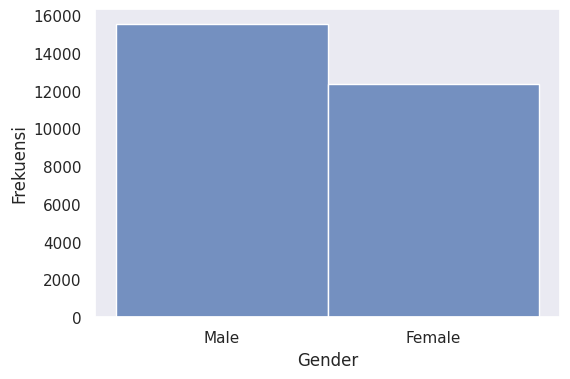

In [48]:
plt.figure(figsize= (6,4))
sns.set_theme(style="dark")
sns.histplot(data= df, x = "Gender", palette="pastel")
plt.ylabel("Frekuensi")
plt.show()

<Axes: ylabel='count'>

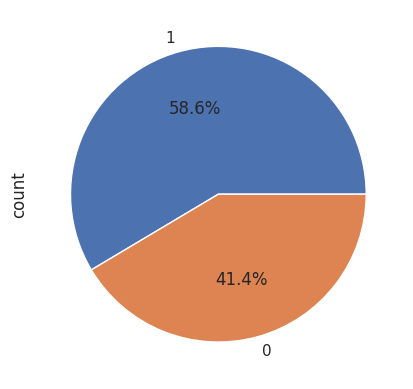

In [49]:
df["Depression"].value_counts().plot(kind="pie", autopct="%1.1f%%")

# **Data Preprocessing**

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27898 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27898 non-null  int64  
 1   Gender                                 27898 non-null  object 
 2   Age                                    27898 non-null  float64
 3   City                                   27898 non-null  object 
 4   Profession                             27898 non-null  object 
 5   Academic Pressure                      27898 non-null  float64
 6   Work Pressure                          27898 non-null  float64
 7   CGPA                                   27898 non-null  float64
 8   Study Satisfaction                     27898 non-null  float64
 9   Job Satisfaction                       27898 non-null  float64
 10  Sleep Duration                         27898 non-null  object 
 11  Dietary

In [54]:
gd = LabelEncoder()
ct = LabelEncoder()
pf = LabelEncoder()
sd = LabelEncoder()
dh = LabelEncoder()
dg = LabelEncoder()
hy = LabelEncoder()
fh = LabelEncoder()

df["Gender"] = gd.fit_transform(df["Gender"])
df["City"] = ct.fit_transform(df["City"])
df["Profession"] = pf.fit_transform(df["Profession"])
df["Sleep Duration"] = sd.fit_transform(df["Sleep Duration"])
df["Dietary Habits"] = dh.fit_transform(df["Dietary Habits"])
df["Degree"] = dg.fit_transform(df["Degree"])
df["Have you ever had suicidal thoughts ?"] = hy.fit_transform(df["Have you ever had suicidal thoughts ?"])
df["Family History of Mental Illness"] = fh.fit_transform(df["Family History of Mental Illness"])

In [59]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [57]:
X = df.drop(columns = "Depression")
y = df["Depression"]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# **Modelling**

In [62]:
clf =SVC(kernel="linear")
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)

print(classification_report(y_pred, y_test))
print(accuracy)
print("Accuracy : {:.2f}%".format(accuracy*100))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81      2145
           1       0.90      0.84      0.87      3435

    accuracy                           0.84      5580
   macro avg       0.83      0.84      0.84      5580
weighted avg       0.85      0.84      0.85      5580

0.8446236559139785
Accuracy : 84.46%
